In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 140 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638748 sha256=744a522d5f999616a5c30e46155e197ef9faa33582edb7a089eb800d4809dc03
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
##Import the requred libraries

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [ ]:
# #Import csv file to colab
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# #Creating pandas df
#import io
#df = pd.read_csv(io.BytesIO(uploaded['datasets_302666_618181_AAPL.csv']))

In [ ]:
df = pd.read_csv('datasets_302666_618181_AAPL.csv')

In [ ]:
from pandas.tseries.offsets import BDay

Series has to be read as a daily series with Mon-Friday as weekdays, hence frequency is defined as Bday().. Else if you define frequency as 365, it would assume that exchange was working for all 365 days


In [ ]:
df.shape

(251, 7)

In [ ]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2018-08-15  209.220001  210.740005  208.330002  210.240005  207.027420   
1  2018-08-16  211.750000  213.809998  211.470001  213.320007  210.060333   
2  2018-08-17  213.440002  217.949997  213.160004  217.580002  214.255234   
3  2018-08-20  218.100006  219.179993  215.110001  215.460007  212.167633   
4  2018-08-21  216.800003  217.190002  214.029999  215.039993  211.754028   

     Volume  
0  28807600  
1  28500400  
2  35427000  
3  30287700  
4  26159800

In [ ]:
# We have considered Volume as a dependent variable for this session. Readers are advised to look at Adj. Close and Open price as dependent variable for univariate Time Series Prediction
df_date = df[['Date','Volume']]

In [ ]:
date1 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=BDay())

In [ ]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [ ]:
date = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)

In [ ]:
date

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [ ]:
df_date['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df_date.head()
df_date.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date    Volume Time_Stamp
246  2019-08-08  27009500 2019-08-08
247  2019-08-09  24619700 2019-08-09
248  2019-08-12  22474900 2019-08-12
249  2019-08-13  47218500 2019-08-13
250  2019-08-14  36453100 2019-08-14

In [ ]:
rcParams['figure.figsize'] = 15,8

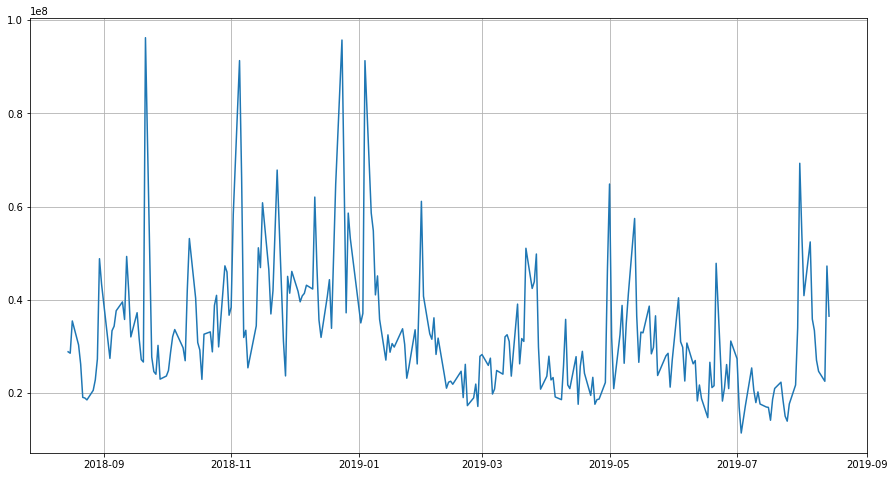

In [ ]:
plt.plot(df_date['Time_Stamp'],df_date['Volume']);
plt.grid()

In [ ]:
df_date.describe()

Volume
count  2.510000e+02
mean   3.289967e+07
std    1.385336e+07
min    1.136200e+07
25%    2.329740e+07
50%    2.985580e+07
75%    3.927970e+07
max    9.624670e+07

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
df_date.describe()

Volume
count        251
mean  32,899,671
std   13,853,358
min   11,362,000
25%   23,297,400
50%   29,855,800
75%   39,279,700
max   96,246,700

In [ ]:
## Alternate way of reading the data as time series.
## Squeeze = True will return the index col as series
df_final = pd.read_csv("datasets_302666_618181_AAPL.csv",parse_dates=True,squeeze=True,index_col=0)

In [ ]:
df_final.head()

Open  High  Low  Close  Adj Close    Volume
Date                                                   
2018-08-15   209   211  208    210        207  28807600
2018-08-16   212   214  211    213        210  28500400
2018-08-17   213   218  213    218        214  35427000
2018-08-20   218   219  215    215        212  30287700
2018-08-21   217   217  214    215        212  26159800

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
rcParams['figure.figsize'] = 15,8

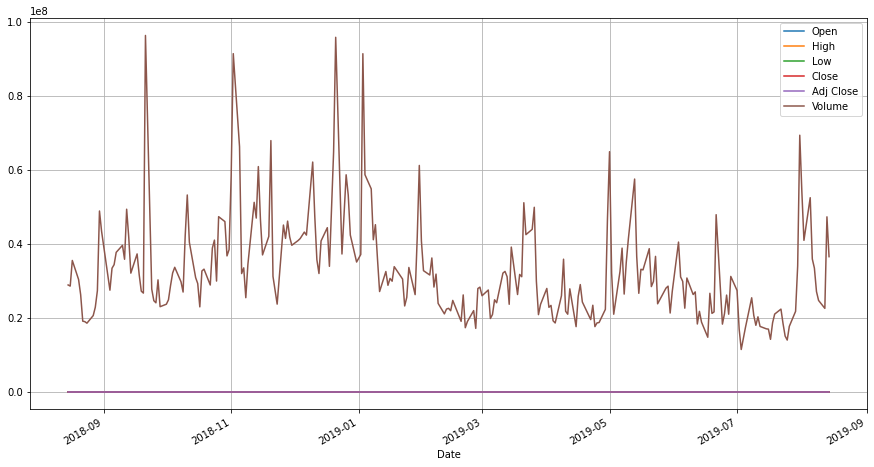

In [ ]:
df_final.plot();
plt.grid()

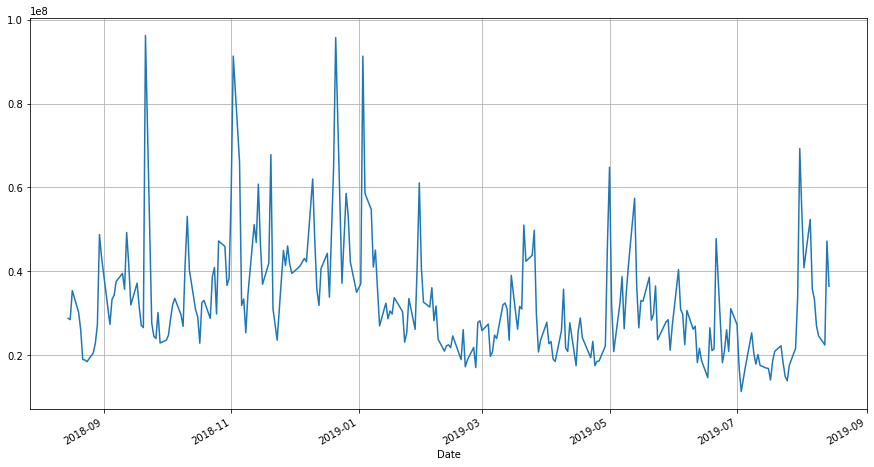

In [ ]:
df_final['Volume'].plot();
plt.grid()

Yearly Plot

# Plot the boxplot of the 'Volume' variable with respect to the different years.

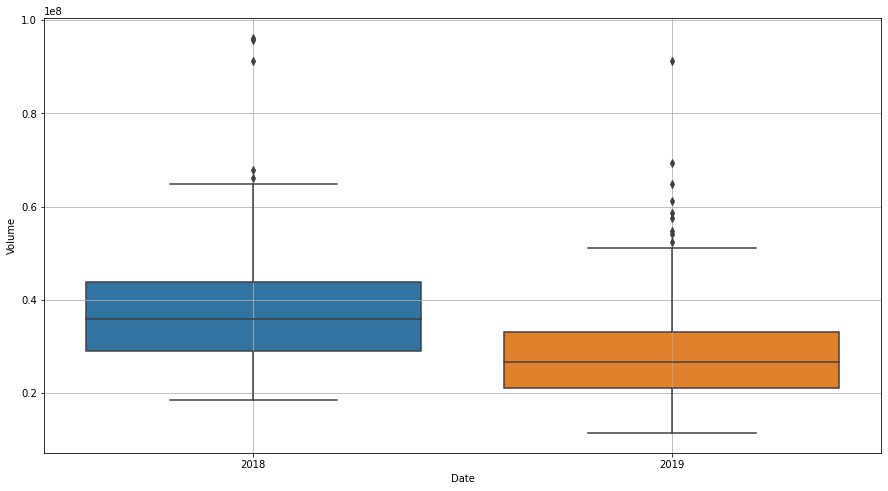

In [ ]:
sns.boxplot(x = df_final.index.year,y = df_final['Volume'])
plt.grid();

# Plot the boxplot of the 'Volume' variable with respect to months of different.

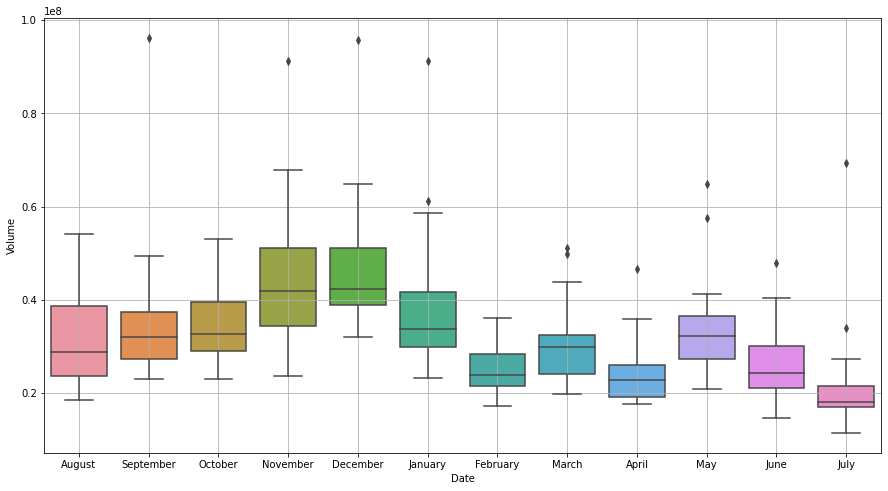

In [ ]:
sns.boxplot(x = df_final.index.month_name(),y = df_final['Volume'])
plt.grid();

# Decompose the 'Volume' variable Time Series.

In [ ]:
df_date['Time_Stamp'] = pd.to_datetime(df_date['Time_Stamp'])
df_model = df_date.set_index('Time_Stamp')
df_model.drop(['Date'], axis=1, inplace=True)
df_model.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Volume
Time_Stamp          
2019-08-08  27009500
2019-08-09  24619700
2019-08-12  22474900
2019-08-13  47218500
2019-08-14  36453100

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



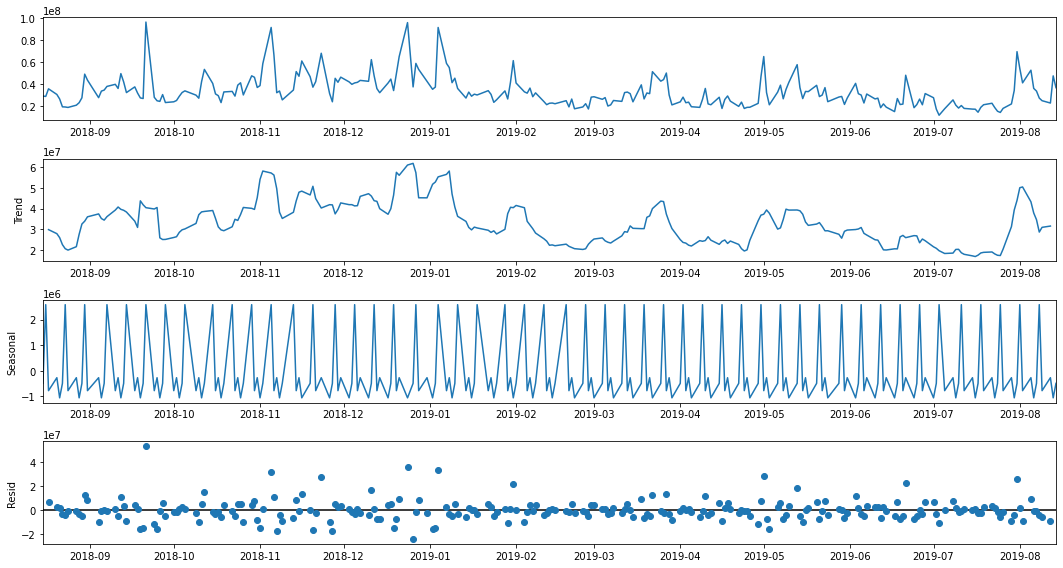

In [ ]:
decomposition = seasonal_decompose(df_model,model='additive', freq=5)
decomposition.plot();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



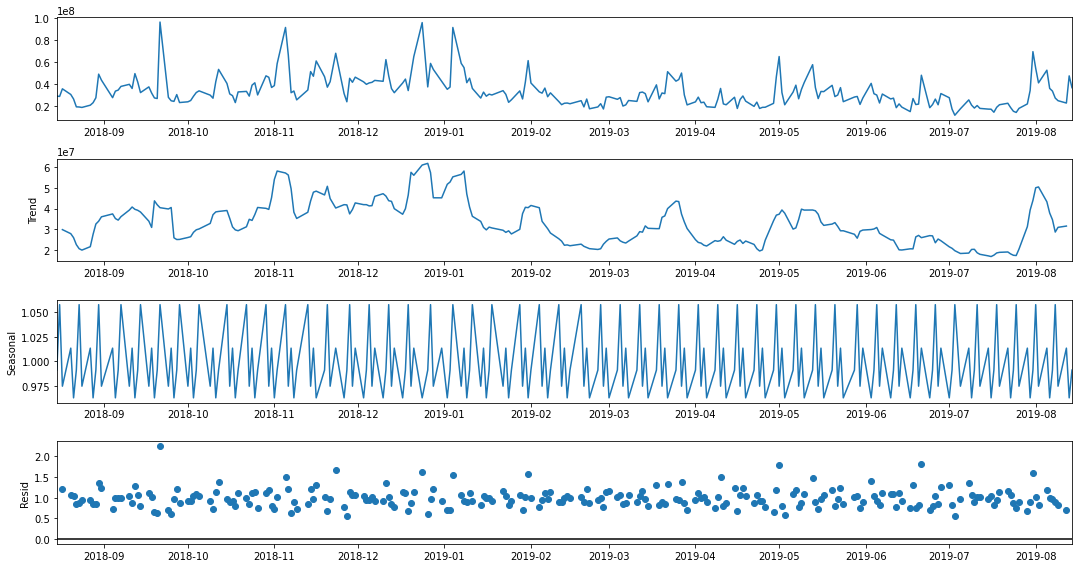

In [ ]:
decomposition = seasonal_decompose(df_model,model='multiplicative', freq=5)
decomposition.plot();

So series is Additive

In [ ]:
# Split the data into training and test set before building the models.

In [ ]:
### We will consider the original dataset and subseqeuntly we would require exogeneous variables

df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

Date  Open  High  Low  Close  Adj Close    Volume Time_Stamp
246  2019-08-08   200   204  199    203        203  27009500 2019-08-08
247  2019-08-09   201   203  199    201        201  24619700 2019-08-09
248  2019-08-12   200   202  199    200        200  22474900 2019-08-12
249  2019-08-13   201   212  200    209        209  47218500 2019-08-13
250  2019-08-14   203   206  203    203        203  36453100 2019-08-14

In [ ]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df_final_model = df.set_index('Time_Stamp')
#df_final_model.drop(['Date'], axis=1, inplace=True)
df_final_model

Date  Open  High  Low  Close  Adj Close    Volume
Time_Stamp                                                         
2018-08-15  2018-08-15   209   211  208    210        207  28807600
2018-08-16  2018-08-16   212   214  211    213        210  28500400
2018-08-17  2018-08-17   213   218  213    218        214  35427000
2018-08-20  2018-08-20   218   219  215    215        212  30287700
2018-08-21  2018-08-21   217   217  214    215        212  26159800
...                ...   ...   ...  ...    ...        ...       ...
2019-08-08  2019-08-08   200   204  199    203        203  27009500
2019-08-09  2019-08-09   201   203  199    201        201  24619700
2019-08-12  2019-08-12   200   202  199    200        200  22474900
2019-08-13  2019-08-13   201   212  200    209        209  47218500
2019-08-14  2019-08-14   203   206  203    203        203  36453100

[251 rows x 7 columns]

In [ ]:
# Split the series into train and test
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

Date  Open  High  Low  Close  Adj Close    Volume  Month  \
Time_Stamp                                                                   
2018-08-15  2018-08-15   209   211  208    210        207  28807600      8   
2018-08-16  2018-08-16   212   214  211    213        210  28500400      8   
2018-08-17  2018-08-17   213   218  213    218        214  35427000      8   
2018-08-20  2018-08-20   218   219  215    215        212  30287700      8   
2018-08-21  2018-08-21   217   217  214    215        212  26159800      8   

            Year  
Time_Stamp        
2018-08-15  2018  
2018-08-16  2018  
2018-08-17  2018  
2018-08-20  2018  
2018-08-21  2018

In [ ]:
df_final_model.tail()

Date  Open  High  Low  Close  Adj Close    Volume  Month  \
Time_Stamp                                                                   
2019-08-08  2019-08-08   200   204  199    203        203  27009500      8   
2019-08-09  2019-08-09   201   203  199    201        201  24619700      8   
2019-08-12  2019-08-12   200   202  199    200        200  22474900      8   
2019-08-13  2019-08-13   201   212  200    209        209  47218500      8   
2019-08-14  2019-08-14   203   206  203    203        203  36453100      8   

            Year  
Time_Stamp        
2019-08-08  2019  
2019-08-09  2019  
2019-08-12  2019  
2019-08-13  2019  
2019-08-14  2019

In [ ]:
train= df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2019-06-14')]
train.shape

(208, 9)

In [ ]:
test= df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-14')]
test.shape

(43, 9)

In [ ]:
train_final = train[['Volume']]
test_final=test[['Volume']]

In [ ]:
print(train_final.shape)
print(test_final.shape)

(208, 1)
(43, 1)


In [ ]:
train_final.tail()

Volume
Time_Stamp          
2019-06-07  30684400
2019-06-10  26220900
2019-06-11  26932900
2019-06-12  18253200
2019-06-13  21674600

In [ ]:
test_final.tail()

Volume
Time_Stamp          
2019-08-08  27009500
2019-08-09  24619700
2019-08-12  22474900
2019-08-13  47218500
2019-08-14  36453100

# Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

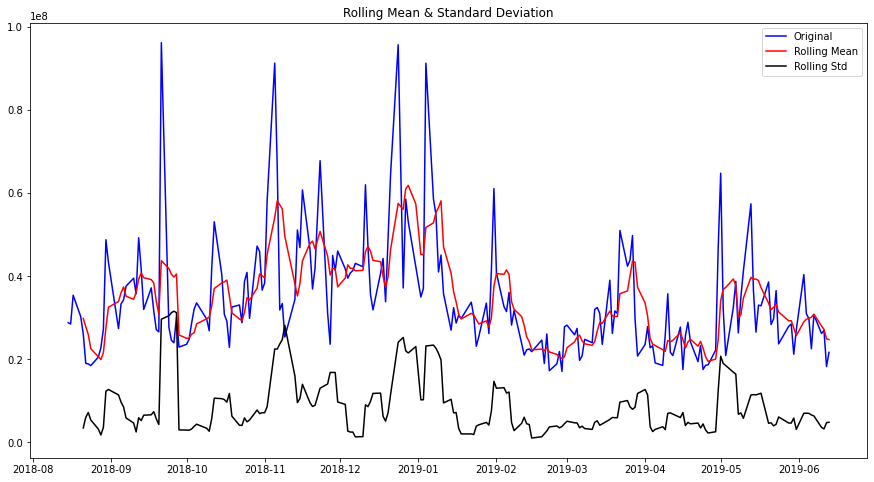

Results of Dickey-Fuller Test:
Test Statistic                 -3
p-value                         0
#Lags Used                      6
Number of Observations Used   201
Critical Value (1%)            -3
Critical Value (5%)            -3
Critical Value (10%)           -3
dtype: float64 



In [ ]:
test_stationarity(train_final['Volume'])

In [ ]:
## Series is stationary at 5% Alpha as per Dicky Fuller

In [ ]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


# Build an ARIMA model.

In [ ]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train_final['Volume'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 0) - AIC:7429.532057941741
ARIMA(0, 0, 1) - AIC:7384.221256038377
ARIMA(0, 0, 2) - AIC:7378.115357469762
ARIMA(1, 0, 0) - AIC:7372.073212600577
ARIMA(1, 0, 1) - AIC:7373.158386281593
ARIMA(1, 0, 2) - AIC:7365.800378313311
ARIMA(2, 0, 0) - AIC:7373.694123850266
ARIMA(2, 0, 1) - AIC:7367.025493613755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 2) - AIC:7367.695589547777


In [ ]:
dfObj.sort_values(by=['AIC'])

param   AIC
5  (1, 0, 2) 7,366
7  (2, 0, 1) 7,367
8  (2, 0, 2) 7,368
3  (1, 0, 0) 7,372
4  (1, 0, 1) 7,373
6  (2, 0, 0) 7,374
2  (0, 0, 2) 7,378
1  (0, 0, 1) 7,384
0  (0, 0, 0) 7,430

In [ ]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_final['Volume'], order=(1,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  208
Model:                     ARMA(1, 2)   Log Likelihood               -3677.900
Method:                       css-mle   S.D. of innovations       11548148.213
Date:                Sat, 22 Oct 2022   AIC                           7365.800
Time:                        01:42:34   BIC                           7382.488
Sample:                             0   HQIC                          7372.548
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.434e+07    3.2e+06     10.747      0.000    2.81e+07    4.06e+07
ar.L1.Volume     0.9467      0.040     23.526      0.000       0.868       1.026
ma.L1.Volume    -0.5244      0.080     -6.52

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
final_hat_avg =test_final.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA[0]

array([27317991.11231323, 28687468.10449541, 28988347.32079572,
       29273198.92344205, 29542876.69157742, 29798188.92416038,
       30039900.86266091, 30268736.98470101, 30485383.17551478,
       30690488.78373642, 30884668.56767792, 31068504.53793002,
       31242547.70180906, 31407319.71487858, 31563314.4444955 ,
       31710999.45006733, 31850817.38445725, 31983187.32073732,
       32108506.00826652, 32227149.0618585 , 32339472.08760314,
       32445811.74871657, 32546486.77461398, 32641798.91623002,
       32732033.85044988, 32817462.03636207, 32898339.52589915,
       32974908.73129636, 33047399.15166818, 33116028.06088073,
       33181001.15878176, 33242513.18774002, 33300748.51634211,
       33355881.69199618, 33408077.96409883, 33457493.77933335,
       33504277.25058375, 33548568.60087008, 33590500.58363568,
       33630198.880646  , 33667782.47869164, 33703364.02622475,
       33737050.17099764])

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume,pred_ARIMA[0]))
print(rmse)

13416723.243210765


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 2)'])

resultsDf

Test RMSE
ARIMA(1, 0, 2) 13,416,723

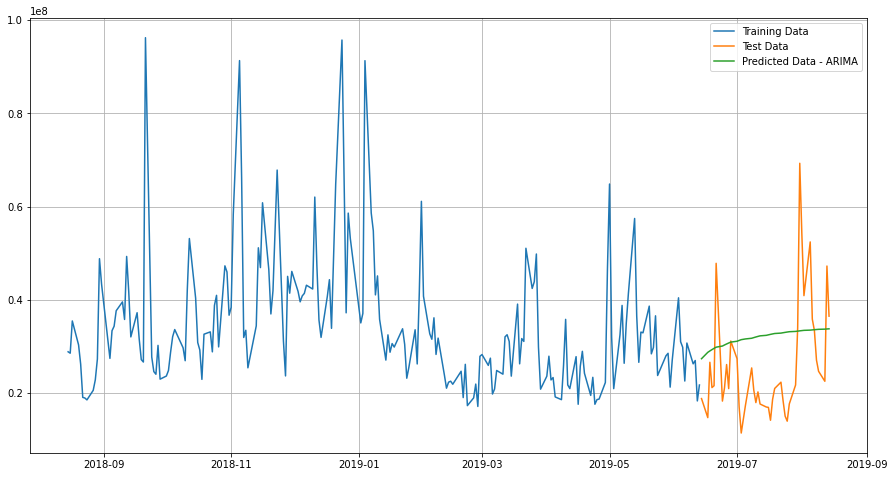

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model.

In [ ]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7516.843047531704
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:7311.014474314488
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:7335.756112170122
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:7240.848774197256
SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:7067.255496879533
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:7120.87452132768


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:7101.7540372073345


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:7069.848627478315
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:7643.903618065293
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:7432.848224473462
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:7241.978553953115


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:7482.677398931117
SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:7401.246131356329


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:7218.723683044125
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:7295.362488980221
SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:7293.113004755331


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:7220.030979839153
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:7579.19554700965
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:7385.377098829449


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:7200.696127783095
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:7486.688579677626
SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:7368.855765239871


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:7186.083308218642
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:7299.850035871188


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:7297.331773703547


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:7187.37288597889
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:7215.043134007794


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:7041.005271647406
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:7215.058330973909
SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:7195.4420275790035


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.169522872811
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:7040.797133692327


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:7022.177154221711


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:7023.007446134361
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:7312.772230019367
SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:7137.525815354398


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:6961.286618388567
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:7173.041387815396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:7146.181150426537


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:6969.473297817733
SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:7000.578933632828


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:6998.987731347996


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:6968.955376775044
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:7263.706658569084


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:7091.746463132793


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:6914.8498855627695
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:7161.423923716513


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:7104.688066618464


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:6929.774699548812


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:6989.311176192572


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:6987.8583849090855


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:6924.3029716196
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:7202.27762275512


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:7028.933671101031
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:7167.835351502853


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:7161.057783640954
SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.512854878184


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:6990.399041050346


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:6982.573995274712


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:6983.068932807838
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:7768.712522781229


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:7439.56493420302


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:7218.868423443306


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:7127.425976177705


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:7129.419207533478


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:6965.284736246706


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:7032.8595549588845


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:6964.018601621698


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so wi

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:6960.322174680568
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:7265.5031261588265
SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:7092.752413681305


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:6916.63834546453


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:7127.911349480699


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:7105.97798974527


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:6931.614277901168


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:6952.429104212759


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so wi

SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:6953.662021380314
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:6926.05867107176


In [ ]:
dfObj2.sort_values(by=['AIC'])

param      seasonal   AIC
47  (1, 0, 2)  (0, 0, 2, 5) 6,915
74  (2, 0, 2)  (0, 0, 2, 5) 6,917
53  (1, 0, 2)  (2, 0, 2, 5) 6,924
80  (2, 0, 2)  (2, 0, 2, 5) 6,926
50  (1, 0, 2)  (1, 0, 2, 5) 6,930
..        ...           ...   ...
1   (0, 0, 0)  (0, 0, 1, 5) 7,517
18  (0, 0, 2)  (0, 0, 0, 5) 7,579
9   (0, 0, 1)  (0, 0, 0, 5) 7,644
63  (2, 0, 1)  (0, 0, 0, 5) 7,769
0   (0, 0, 0)  (0, 0, 0, 5) 7,804

[81 rows x 3 columns]

In [ ]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],
                                order=(1,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3451.425
Date:                           Sat, 22 Oct 2022   AIC                           6914.850
Time:                                   01:43:11   BIC                           6934.488
Sample:                                        0   HQIC                          6922.801
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.004    225.806      0.000       0.990       1.007
ma.L1         -0.5661      0.056    -10.020

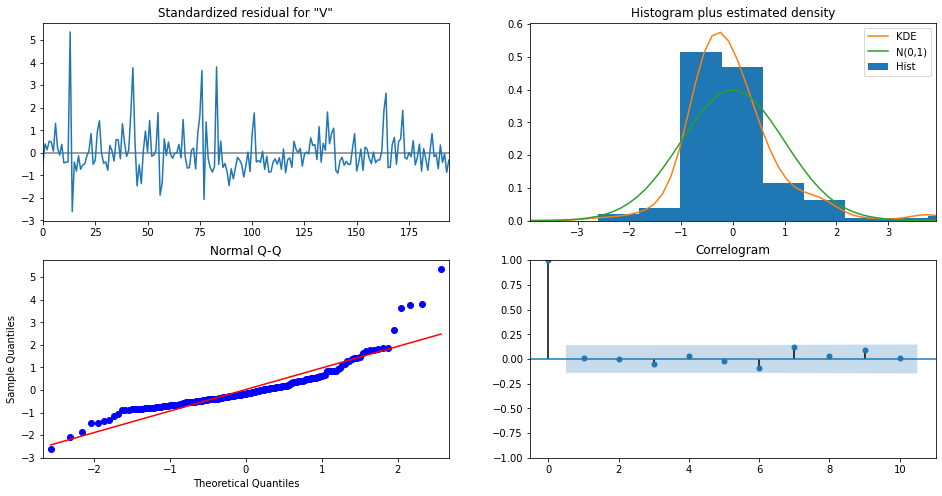

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
final_hat_avg =test_final.copy()
pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208   25,516,756
209   25,112,108
210   26,049,307
211   26,654,835
212   27,487,914
213   26,062,044
214   26,671,305
215   26,463,221
216   27,556,266
217   27,242,725
218   26,559,884
219   26,384,402
220   26,341,687
221   26,299,042
222   26,256,465
223   26,213,958
224   26,171,519
225   26,129,149
226   26,086,847
227   26,044,614
228   26,002,450
229   25,960,353
230   25,918,325
231   25,876,365
232   25,834,473
233   25,792,648
234   25,750,891
235   25,709,202
236   25,667,581
237   25,626,026
238   25,584,539
239   25,543,120
240   25,501,767
241   25,460,481
242   25,419,262
243   25,378,110
244   25,337,024
245   25,296,005
246   25,255,052
247   25,214,166
248   25,173,346
249   25,132,592
250   25,091,904
Name: predicted_mean, dtype: float64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume,pred_SARIMA.predicted_mean))
print(rmse)

12585807.674978457


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)            13,416,723
SARIMA(1, 0, 2)(0, 0, 2)5 12,585,808

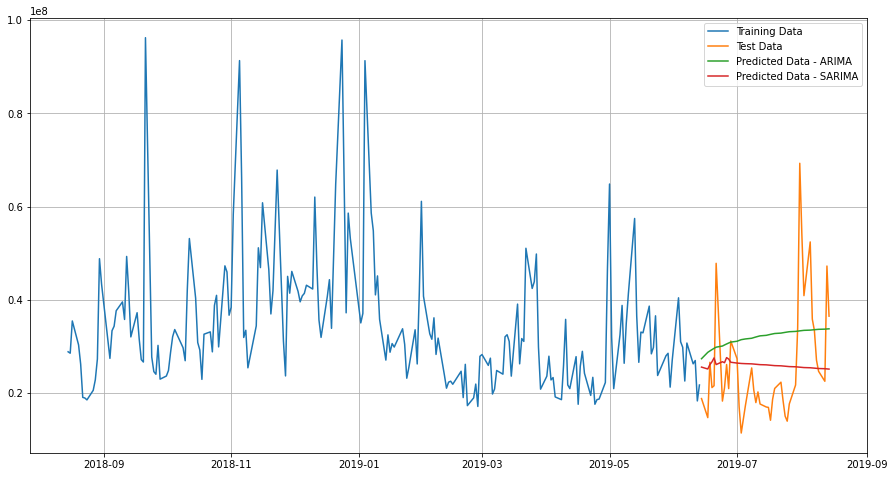

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
## RMSE has reduced in comparison to ARIMA when seasonality was introduced

# Build a SARIMAX model.

In [ ]:
### Let's create exogeneous variables

ex_train=train[['High','Low']]
ex_test=test[['High','Low']]
ex_train.head()

High  Low
Time_Stamp           
2018-08-15   211  208
2018-08-16   214  211
2018-08-17   218  213
2018-08-20   219  215
2018-08-21   217  214

In [ ]:
dfObj3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj3

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
## Let's first use SARIMAX with exogenous variable 
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfObj3 = dfObj3.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 0)(0, 0, 0, 5) - AIC:8220.439307896286
SARIMA(0, 0, 0)(0, 0, 1, 5) - AIC:7146.769049370061
SARIMA(0, 0, 0)(0, 0, 2, 5) - AIC:6973.675219174668
SARIMA(0, 0, 0)(1, 0, 0, 5) - AIC:7180.20605065661


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)(1, 0, 1, 5) - AIC:7140.214862591105
SARIMA(0, 0, 0)(1, 0, 2, 5) - AIC:6969.373288041485


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 0)(2, 0, 0, 5) - AIC:7005.807851815784
SARIMA(0, 0, 0)(2, 0, 1, 5) - AIC:7003.43862030498
SARIMA(0, 0, 0)(2, 0, 2, 5) - AIC:6963.981257917682
SARIMA(0, 0, 1)(0, 0, 0, 5) - AIC:7266.466891877488
SARIMA(0, 0, 1)(0, 0, 1, 5) - AIC:7093.314856048803


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 1)(0, 0, 2, 5) - AIC:6922.054987010524
SARIMA(0, 0, 1)(1, 0, 0, 5) - AIC:7162.336463345246
SARIMA(0, 0, 1)(1, 0, 1, 5) - AIC:7091.61990916945


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 1)(1, 0, 2, 5) - AIC:6920.715937319923
SARIMA(0, 0, 1)(2, 0, 0, 5) - AIC:6990.991123660682


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(2, 0, 1, 5) - AIC:6990.361146714515


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(2, 0, 2, 5) - AIC:6922.054949329705
SARIMA(0, 0, 2)(0, 0, 0, 5) - AIC:7228.873007460348
SARIMA(0, 0, 2)(0, 0, 1, 5) - AIC:7057.612581905889


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 2)(0, 0, 2, 5) - AIC:6885.362025266866
SARIMA(0, 0, 2)(1, 0, 0, 5) - AIC:7161.072951167742


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(1, 0, 1, 5) - AIC:7056.719525741492


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(1, 0, 2, 5) - AIC:6884.313069291099
SARIMA(0, 0, 2)(2, 0, 0, 5) - AIC:6990.07533509787


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(2, 0, 1, 5) - AIC:6989.613668100469


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(2, 0, 2, 5) - AIC:6885.7815366100585
SARIMA(1, 0, 0)(0, 0, 0, 5) - AIC:7293.182651274299
SARIMA(1, 0, 0)(0, 0, 1, 5) - AIC:7122.5631214809655
SARIMA(1, 0, 0)(0, 0, 2, 5) - AIC:6952.317767376765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(1, 0, 0)(1, 0, 0, 5) - AIC:7122.490205725969
SARIMA(1, 0, 0)(1, 0, 1, 5) - AIC:7122.031664879005


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(1, 0, 2, 5) - AIC:6951.560954188788
SARIMA(1, 0, 0)(2, 0, 0, 5) - AIC:6952.140641780617


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(2, 0, 1, 5) - AIC:6951.6015343535655


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(2, 0, 2, 5) - AIC:6953.180227756318
SARIMA(1, 0, 1)(0, 0, 0, 5) - AIC:7251.074495812758


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(0, 0, 1, 5) - AIC:7079.076442227177


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(0, 0, 2, 5) - AIC:6908.765859949616
SARIMA(1, 0, 1)(1, 0, 0, 5) - AIC:7113.735374492481


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(1, 0, 1, 5) - AIC:7080.973702344028


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(1, 0, 2, 5) - AIC:6909.849753102044


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 0, 5) - AIC:6943.266684071786


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 1, 5) - AIC:6945.085831796446


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 2, 5) - AIC:6902.482894386075
SARIMA(1, 0, 2)(0, 0, 0, 5) - AIC:7215.087510251138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(0, 0, 1, 5) - AIC:7044.252186835917


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(0, 0, 2, 5) - AIC:6872.11332019369
SARIMA(1, 0, 2)(1, 0, 0, 5) - AIC:7113.081312127815


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(1, 0, 1, 5) - AIC:7046.150420894855


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(1, 0, 2, 5) - AIC:6873.443826528618


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 0, 5) - AIC:6942.654368208503


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 1, 5) - AIC:6943.921974656709


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 2, 5) - AIC:6875.342423973251
SARIMA(2, 0, 0)(0, 0, 0, 5) - AIC:7257.838452716163
SARIMA(2, 0, 0)(0, 0, 1, 5) - AIC:7122.246219453074


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided,

SARIMA(2, 0, 0)(0, 0, 2, 5) - AIC:6952.326939853003
SARIMA(2, 0, 0)(1, 0, 0, 5) - AIC:7087.823597805567


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(1, 0, 1, 5) - AIC:7087.973270579232


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(1, 0, 2, 5) - AIC:6951.74874924
SARIMA(2, 0, 0)(2, 0, 0, 5) - AIC:6917.637381664119


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(2, 0, 1, 5) - AIC:6917.262503452217
SARIMA(2, 0, 0)(2, 0, 2, 5) - AIC:6919.656666143661


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(0, 0, 0, 5) - AIC:7249.711589566404
SARIMA(2, 0, 1)(0, 0, 1, 5) - AIC:7078.6154169926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(0, 0, 2, 5) - AIC:6908.150533310596
SARIMA(2, 0, 1)(1, 0, 0, 5) - AIC:7078.658188359397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(1, 0, 1, 5) - AIC:7080.544718805484


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(1, 0, 2, 5) - AIC:6909.407503363179


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 0, 5) - AIC:6908.070103708298


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 1, 5) - AIC:6909.342806481016


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so wi

SARIMA(2, 0, 1)(2, 0, 2, 5) - AIC:6911.26898572946
SARIMA(2, 0, 2)(0, 0, 0, 5) - AIC:7217.081722905117


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(0, 0, 1, 5) - AIC:7046.248715221723


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(0, 0, 2, 5) - AIC:6874.1017877748245


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 0, 5) - AIC:7080.563361826935


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 1, 5) - AIC:7048.145507392004


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 2, 5) - AIC:6875.432040842855


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 0, 5) - AIC:6909.905619969279


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 1, 5) - AIC:6911.219599109079


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 2, 5) - AIC:6871.99532336739


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
dfObj3.sort_values(by=['AIC'])

param      seasonal   AIC
80  (2, 0, 2)  (2, 0, 2, 5) 6,872
47  (1, 0, 2)  (0, 0, 2, 5) 6,872
50  (1, 0, 2)  (1, 0, 2, 5) 6,873
74  (2, 0, 2)  (0, 0, 2, 5) 6,874
53  (1, 0, 2)  (2, 0, 2, 5) 6,875
..        ...           ...   ...
36  (1, 0, 1)  (0, 0, 0, 5) 7,251
54  (2, 0, 0)  (0, 0, 0, 5) 7,258
9   (0, 0, 1)  (0, 0, 0, 5) 7,266
27  (1, 0, 0)  (0, 0, 0, 5) 7,293
0   (0, 0, 0)  (0, 0, 0, 5) 8,220

[81 rows x 3 columns]

In [ ]:
## SARIMAX(1, 0, 2)(0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                order=(2,0,2),
                                seasonal_order=(2,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(2, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3428.051
Date:                           Sat, 22 Oct 2022   AIC                           6874.102
Time:                                   01:44:01   BIC                           6903.559
Sample:                                        0   HQIC                          6886.029
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
High        4.931e+06   1.13e+04    437.134      0.000    4.91e+06    4.95e+06
Low        -4.861e+06   1.08e+04   -450.090

In [ ]:
pred_SARIMAX = results.get_forecast(steps=len(test),exog=ex_test)
pred_SARIMAX.predicted_mean

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208   25,740,932
209   24,108,339
210   35,203,105
211   23,420,395
212   23,857,364
213   24,604,244
214   20,959,532
215   30,310,691
216   29,326,039
217   21,499,845
218   23,487,046
219   30,665,236
220   20,595,107
221   20,672,970
222   22,888,182
223   26,644,165
224   25,316,656
225   22,967,923
226   25,562,206
227   21,323,888
228   21,859,398
229   25,534,912
230   21,682,691
231   23,545,334
232   33,171,024
233   30,747,773
234   21,195,445
235   23,011,380
236   25,641,443
237   26,110,381
238   24,322,630
239   27,490,916
240   63,413,267
241   69,148,328
242   36,825,686
243   42,489,286
244   32,567,959
245   41,018,245
246   33,552,442
247   30,273,174
248   27,483,064
249   70,800,713
250   32,466,276
Name: predicted_mean, dtype: float64

In [ ]:
rmse = sqrt(mean_squared_error(test_final.Volume,pred_SARIMAX.predicted_mean))
print(rmse)

8368516.993543941


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMAX(2, 0, 2)(2, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)             13,416,723
SARIMA(1, 0, 2)(0, 0, 2)5  12,585,808
SARIMAX(1, 0, 2)(0, 0, 2)5  8,368,517

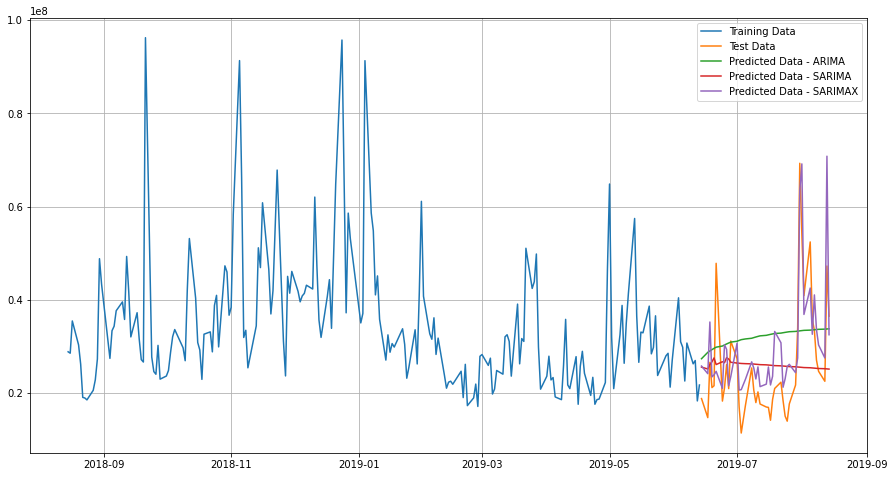

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

In [ ]:
# Build Time Series models using the Prophet Library.

In [ ]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(df['Date'])
df_prophet['y'] = df['Volume']
df_prophet['High']= df['High']
df_prophet['Low']=df['Low']
df_prophet.head()

ds         y  High  Low
0 2018-08-15  28807600   211  208
1 2018-08-16  28500400   214  211
2 2018-08-17  35427000   218  213
3 2018-08-20  30287700   219  215
4 2018-08-21  26159800   217  214

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


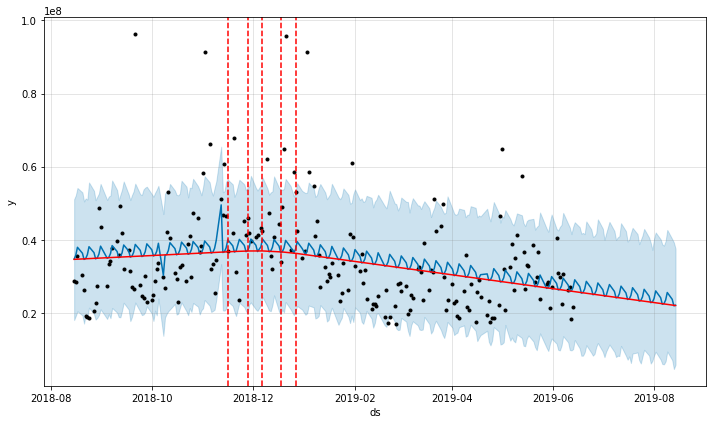

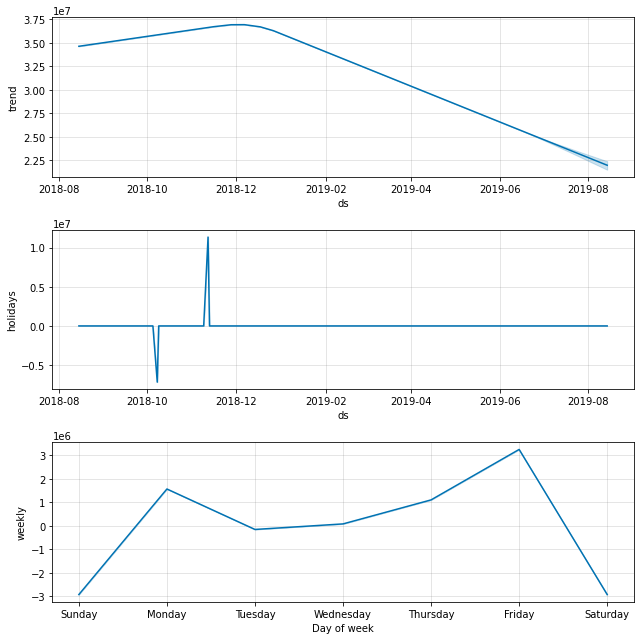

In [ ]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=True)
prophet.add_country_holidays(country_name='US')
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2019-06-13')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

Prophet has included the original data as the black dots and the blue line is the forecast model.

The light blue area is the confidence interval. Using the add_changepoints_to_plot function added the red lines; the vertical dashed lines are changepoints Prophet identified where the trend changed, and the solid red line is the trend with all seasonality removed. 


The components plot consists of 3 sections: the trend, the holidays, and the seasonality. The sum of those 3 components account for the entirety of the model in fact. The trend is simply what the data is showing if you subtract out all of the other components. 

The holidays plot shows the effect of all of the holidays included in the model. Holidays, as implemented in Prophet, can be thought of as unnatural events when the trend will deviate from the baseline but return once the event is over.

The weekly seasonality component shows the change in volumne over 
the week, but with a steep decline on the weekend. 

In [ ]:
import holidays
for date, name in sorted(holidays.US(state='NY', years=2018).items()):
   print(date, name) 

2018-01-01 New Year's Day
2018-01-15 Martin Luther King Jr. Day
2018-02-12 Lincoln's Birthday
2018-02-15 Susan B. Anthony Day
2018-02-19 Washington's Birthday
2018-05-28 Memorial Day
2018-07-04 Independence Day
2018-09-03 Labor Day
2018-10-08 Columbus Day
2018-11-06 Election Day
2018-11-11 Veterans Day
2018-11-12 Veterans Day (Observed)
2018-11-22 Thanksgiving
2018-12-25 Christmas Day


In [ ]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2018-08-15 34,625,579  18,009,225  51,073,843   34,625,579   34,625,579   
1   2018-08-16 34,648,030  19,165,305  52,133,788   34,648,030   34,648,030   
2   2018-08-17 34,670,482  20,415,789  54,155,255   34,670,482   34,670,482   
3   2018-08-20 34,737,835  19,288,697  52,942,280   34,737,835   34,737,835   
4   2018-08-21 34,760,286  17,043,041  50,458,750   34,760,286   34,760,286   
..         ...        ...         ...         ...          ...          ...   
246 2019-08-08 22,363,871   6,726,084  39,657,743   21,949,167   22,731,876   
247 2019-08-09 22,301,732   9,412,385  42,690,743   21,876,810   22,677,111   
248 2019-08-12 22,115,317   7,042,064  40,170,354   21,659,536   22,524,354   
249 2019-08-13 22,053,178   4,605,566  39,244,994   21,584,370   22,476,410   
250 2019-08-14 21,991,040   5,784,971  37,567,154   21,513,665   22,430,401   

     Christmas Day  Christmas Day_lower  Christmas Day_upper  Columbus Day  \
0                0                    0                    0             0   
1                0                    0                    0             0   
2                0                    0                    0             0   
3                0                    0                    0             0   
4                0                    0                    0             0   
..             ...                  ...                  ...           ...   
246              0                    0                    0             0   
247              0                    0                    0             0   
248              0                    0                    0             0   
249              0                    0                    0             0   
250              0                    0                    0             0   

     ...  holidays  holidays_lower  holidays_upper    weekly  weekly_lower  \
0    ...         0               0               0    81,857        81,857   
1    ...         0               0               0 1,104,675     1,104,675   
2    ...         0               0               0 3,252,894     3,252,894   
3    ...         0               0               0 1,568,775     1,568,775   
4    ...         0               0               0  -154,410      -154,410   
..   ...       ...             ...             ...       ...           ...   
246  ...         0               0               0 1,104,675     1,104,675   
247  ...         0               0               0 3,252,894     3,252,894   
248  ...         0               0               0 1,568,775     1,568,775   
249  ...         0               0               0  -154,410      -154,410   
250  ...         0               0               0    81,857        81,857   

     weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0          81,857                     0                           0   
1       1,104,675                     0                           0   
2       3,252,894                     0                           0   
3       1,568,775                     0                           0   
4        -154,410                     0                           0   
..            ...                   ...                         ...   
246     1,104,675                     0                           0   
247     3,252,894                     0                           0   
248     1,568,775                     0                           0   
249      -154,410                     0                           0   
250        81,857                     0                           0   

     multiplicative_terms_upper       yhat  
0                             0 34,707,436  
1                             0 35,752,706  
2                             0 37,923,376  
3                             0 36,306,610  
4                             0 34,605,876  
..                          ...        ...  
246                  

In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

12994432.318679124


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)             13,416,723
SARIMA(1, 0, 2)(0, 0, 2)5  12,585,808
SARIMAX(1, 0, 2)(0, 0, 2)5  8,368,517
Prophet                    12,994,432

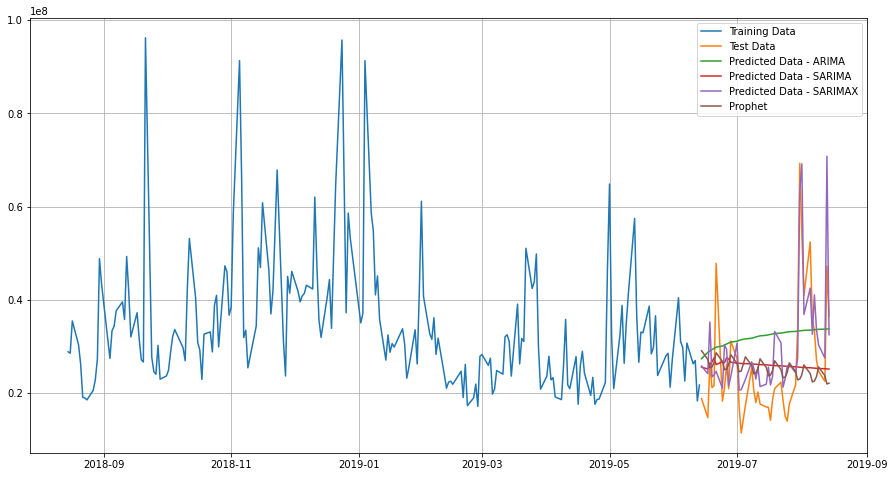

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.legend(loc='best')
plt.grid();

Additional Regressor: If you have independent variables apart from the target forcasted variables, you can add thems as a regressor variables.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


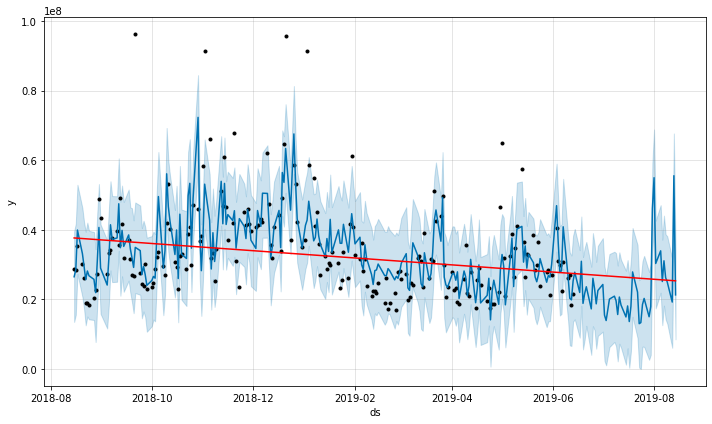

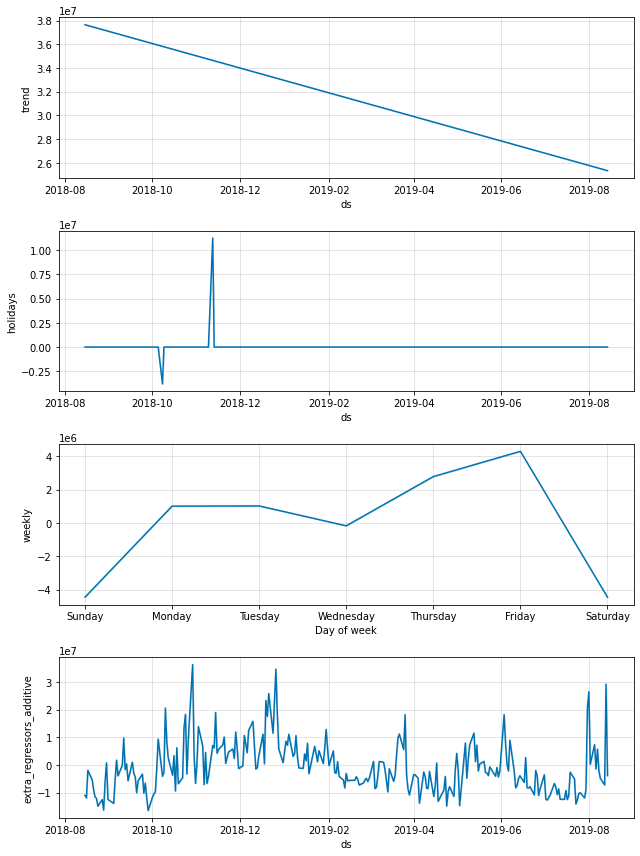

In [ ]:
prophet=Prophet()
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2019-06-14')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
future['High']= df_prophet['High']
future['Low']= df_prophet['Low']
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

7989905.557013396


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet - with exog variables'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)                13,416,723
SARIMA(1, 0, 2)(0, 0, 2)5     12,585,808
SARIMAX(1, 0, 2)(0, 0, 2)5     8,368,517
Prophet                       12,994,432
Prophet - with exog variables  7,989,906

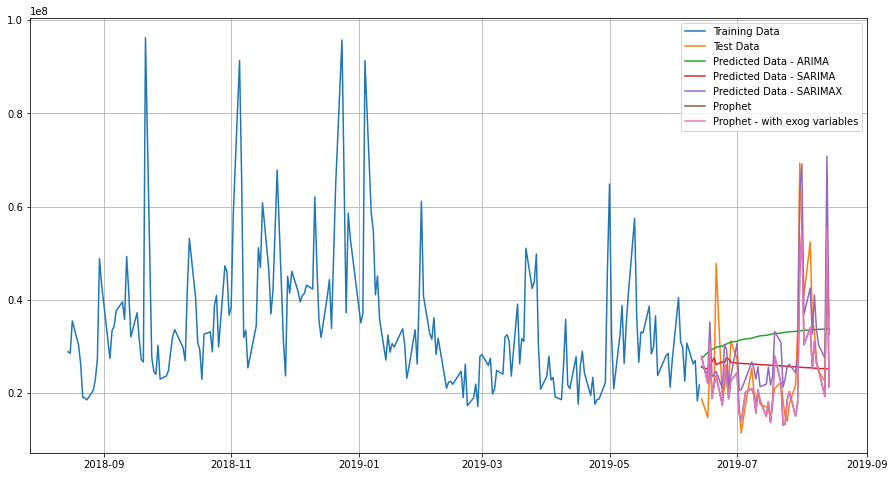

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables')
plt.legend(loc='best')
plt.grid();

Adjusting trend by changepoint_prior_scale: Prophet allow you to adjust the trend in case there is an overfit or underfit. changepoint_prior_scale helps adjust the strength of the trend.
Default value for changepoint_prior_scale is 0.05. Decrease the value to make the trend less flexible. Increase the value of changepoint_prior_scale to make the trend more flexible.
Increasing the changepoint_prior_scale to 0.08 to make the trend flexible


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


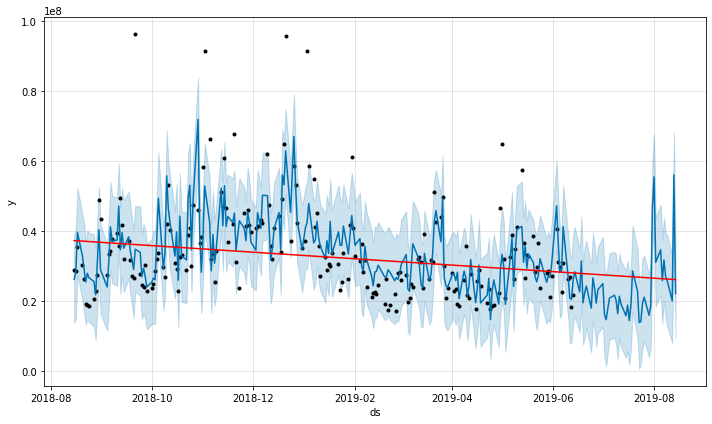

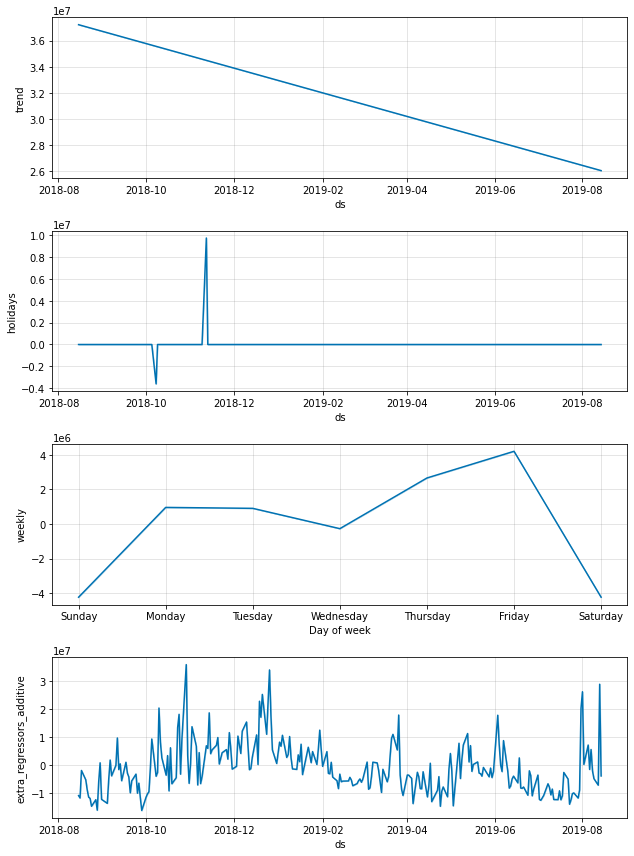

In [ ]:
prophet=Prophet(changepoint_prior_scale=.08,
                  )
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2019-06-14')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
future['High']= df_prophet['High']
future['Low']= df_prophet['Low']
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

7788536.890114892


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet - with exog variables_2.0'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)                    13,416,723
SARIMA(1, 0, 2)(0, 0, 2)5         12,585,808
SARIMAX(1, 0, 2)(0, 0, 2)5         8,368,517
Prophet                           12,994,432
Prophet - with exog variables      7,989,906
Prophet - with exog variables_2.0  7,788,537

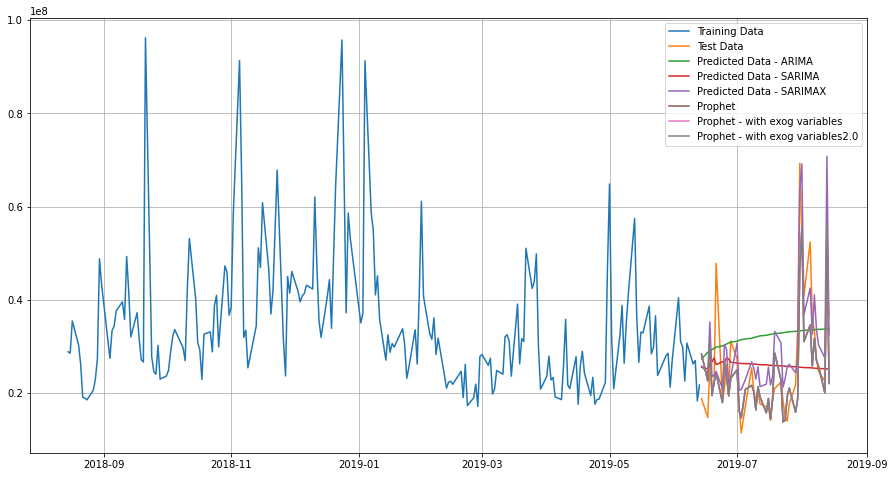

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables2.0')
plt.legend(loc='best')
plt.grid();

https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a

https://facebook.github.io/prophet/






https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/src/timeseries.html#time-series-analysis